In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Abalone.csv")

In [3]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [9]:
df.shape

(4177, 9)

In [10]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [14]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera weight    0
Shell_weight      0
Rings             0
dtype: int64

In [16]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:>

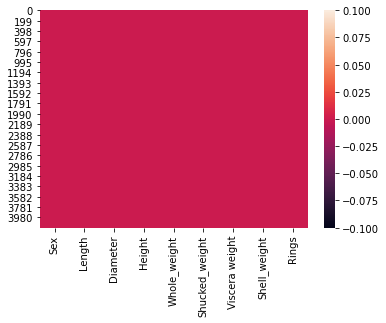

In [20]:
sn.heatmap(df.isnull())

In [22]:
dfcor=df.corr()
dfcor

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera weight,Shell_weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

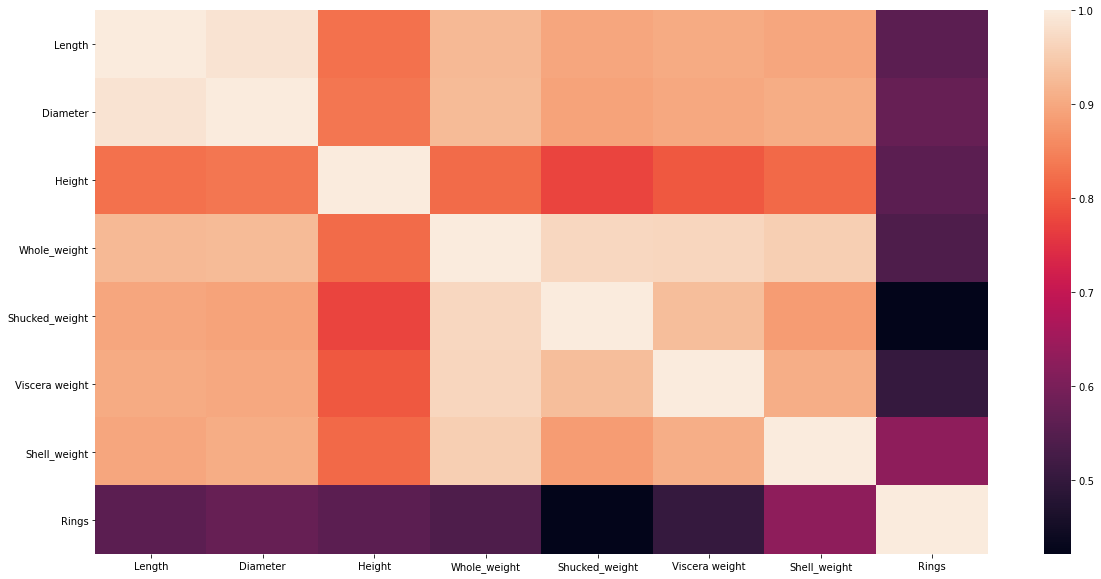

In [25]:
plt.figure(figsize=(20,10))
sn.heatmap(dfcor)

<AxesSubplot:>

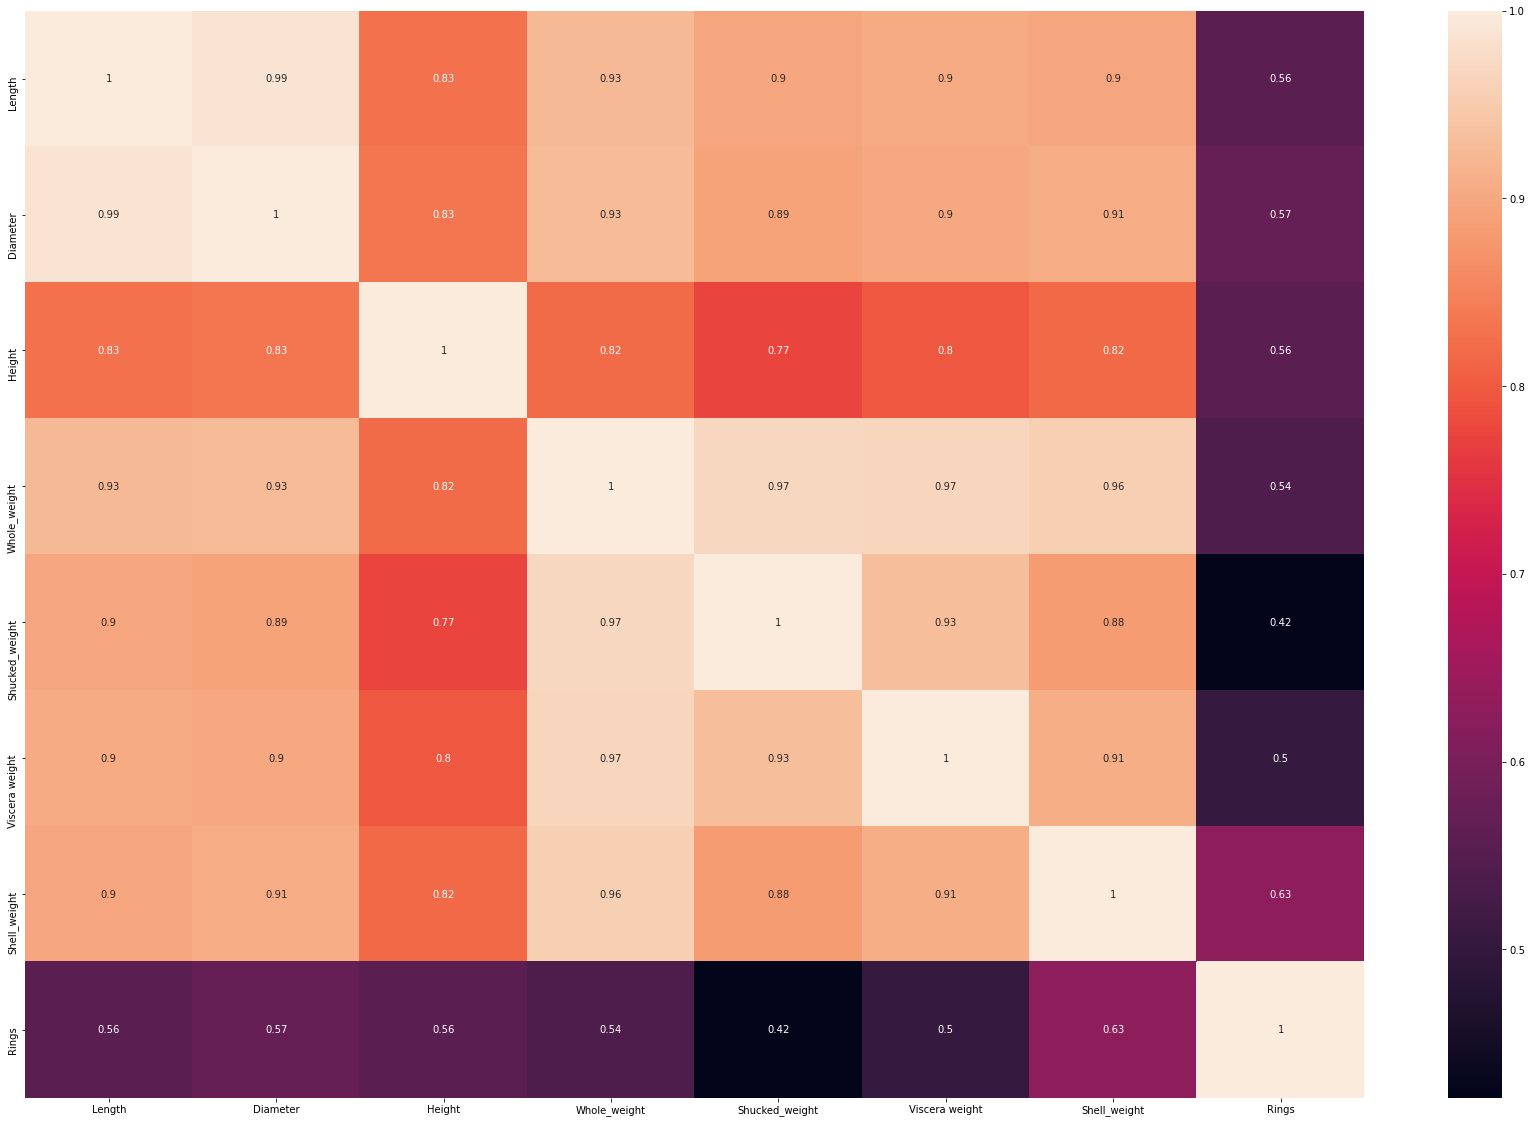

In [29]:
plt.figure(figsize=(30,20))
sn.heatmap(dfcor,annot=True)

In [34]:
df=pd.DataFrame(df)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le=LabelEncoder()

In [50]:
df["Sex"]=le.fit_transform(df["Sex"])

In [48]:
df1=df

In [51]:
df1

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


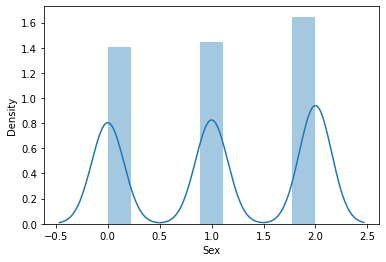

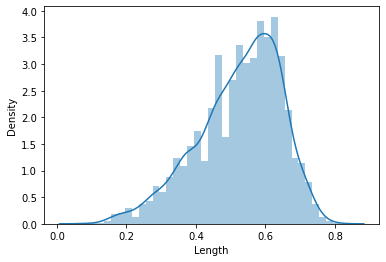

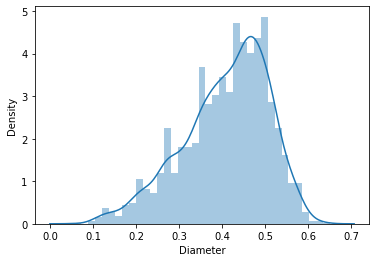

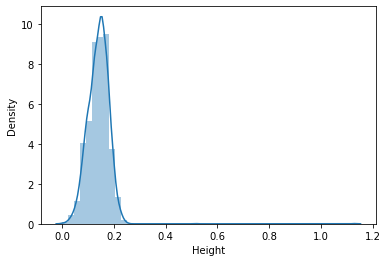

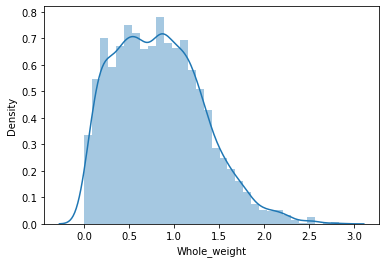

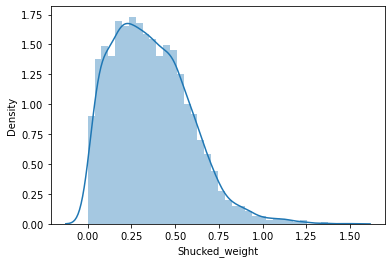

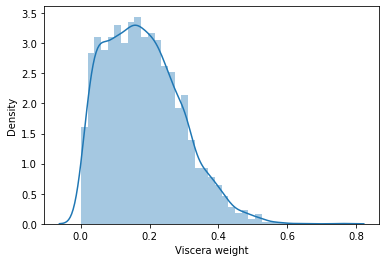

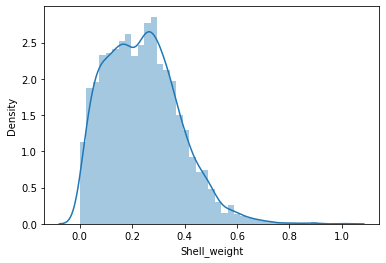

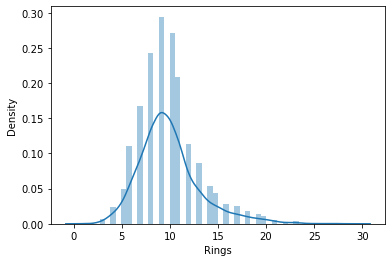

In [58]:
for i in df1.columns:
    plt.figure()
    sn.distplot(df1[i])

Sex                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
Length            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Diameter          AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Height               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Whole_weight      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Shucked_weight    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Viscera weight          AxesSubplot(0.125,0.125;0.227941x0.222059)
Shell_weight         AxesSubplot(0.398529,0.125;0.227941x0.222059)
Rings                AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

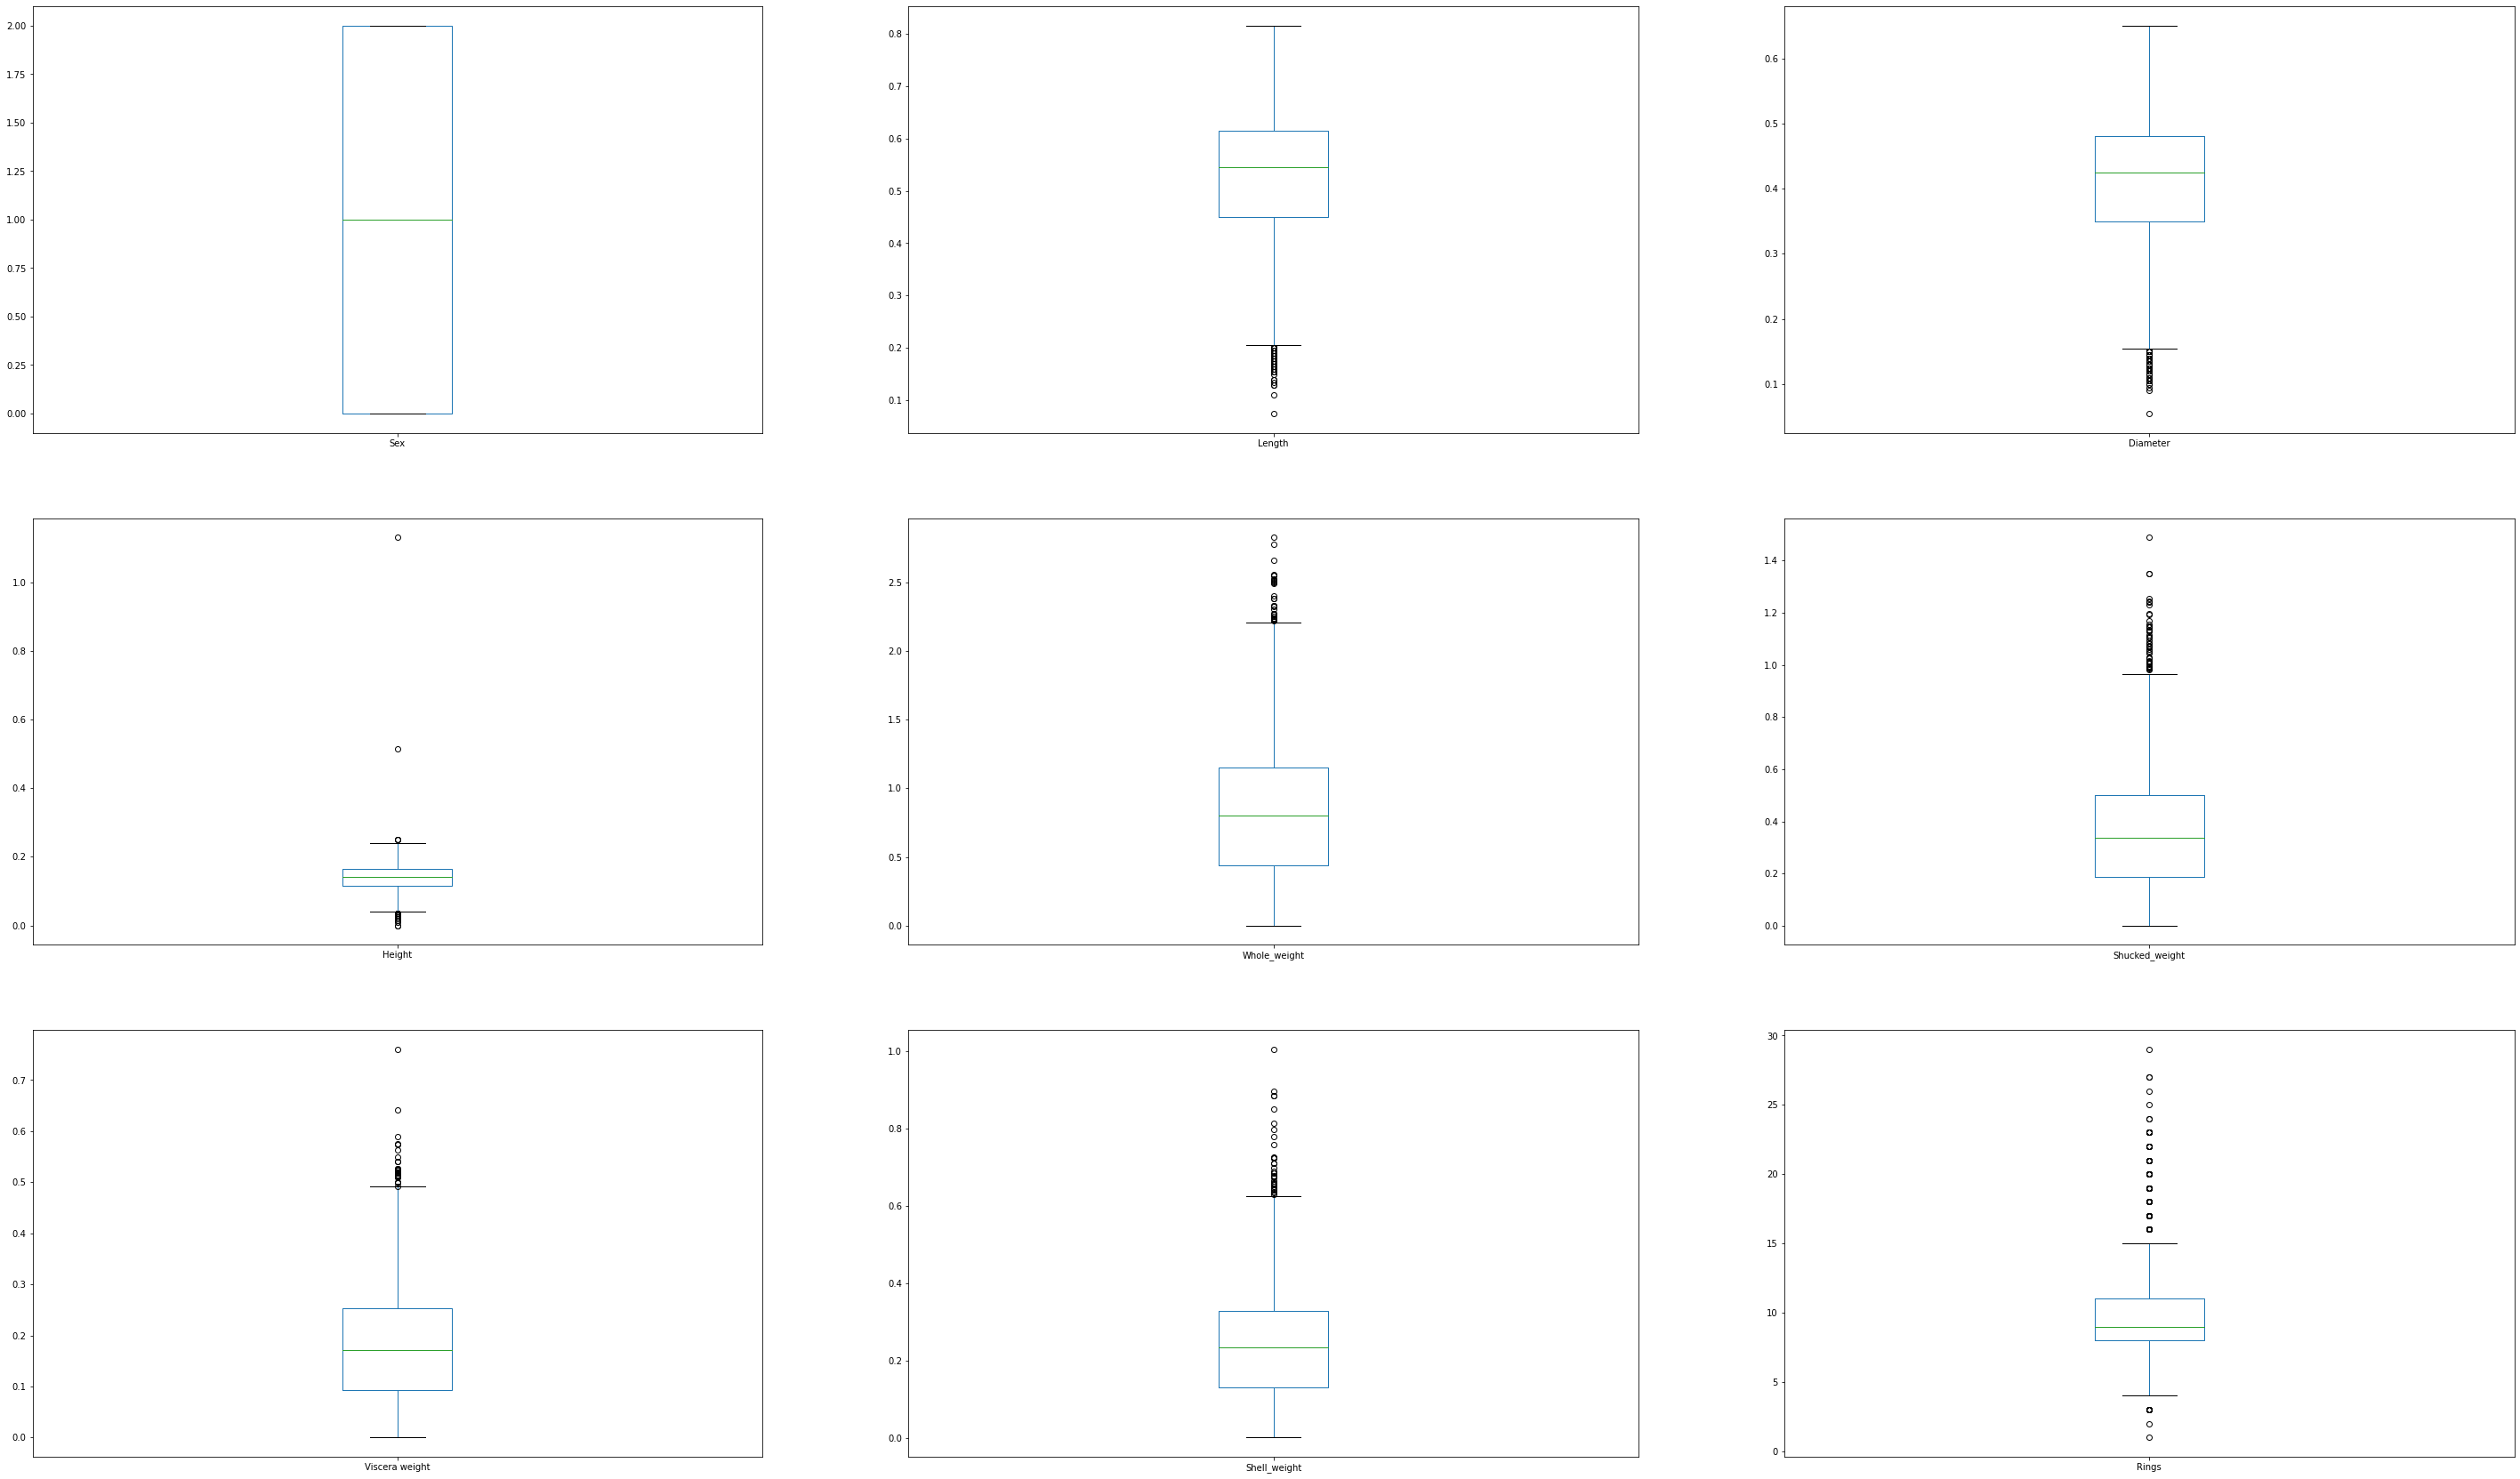

In [67]:
df1.plot(kind="box",subplots=True,figsize=(50,30),layout=(3,3))

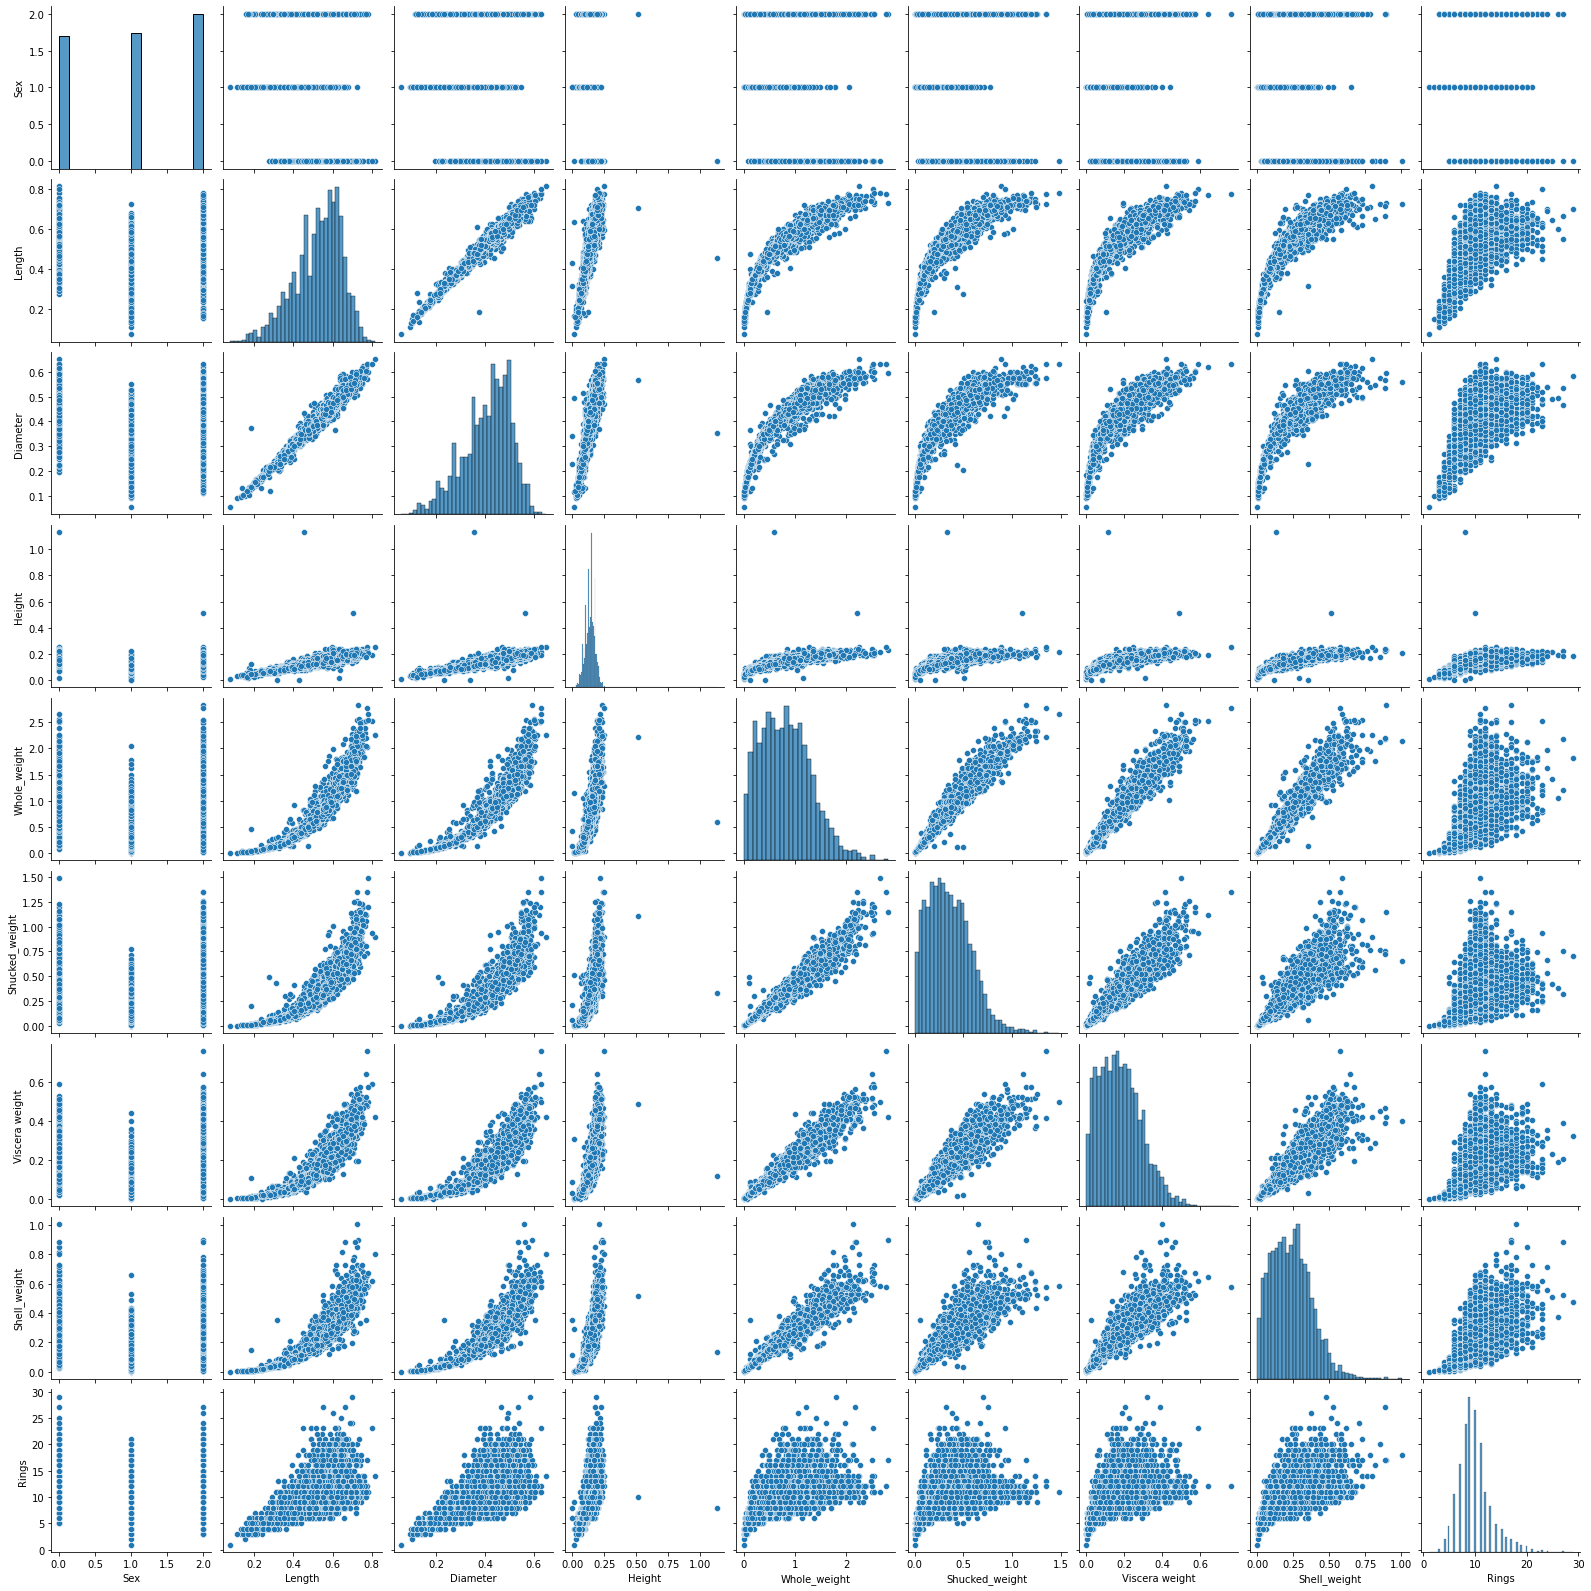

In [53]:
sn.pairplot(df1) 

In [60]:
df1.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [61]:
df1.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [62]:
df1.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [65]:
data=df1.astype(float)
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera weight,Shell_weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


In [66]:
data.dtypes

Sex               float64
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera weight    float64
Shell_weight      float64
Rings             float64
dtype: object

In [69]:
#Modelling

In [72]:
x=data.iloc[:,0:-1]

In [73]:
y=data.iloc[:,-1]

In [77]:
x.shape

(4177, 8)

In [75]:
x.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera weight,Shell_weight
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [79]:
y.shape

(4177,)

In [76]:
y.head()

0    15.0
1     7.0
2     9.0
3    10.0
4     7.0
Name: Rings, dtype: float64

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=50)

In [82]:
x_test.shape

(1254, 8)

In [83]:
y_test.shape

(1254,)

In [84]:
x_train.shape

(2923, 8)

In [85]:
y_train.shape

(2923,)

In [86]:
lr=LinearRegression()

In [88]:
lr=lr.fit(x_train,y_train)
lr

LinearRegression()

In [89]:
lr.coef_

array([  0.04995963,  -2.34507588,  11.3142935 ,  23.29041598,
         6.84934357, -17.17819146,  -8.05347861,  10.10731957])

In [90]:
lr.intercept_

2.787443022423198

In [91]:
lr.score(x_train,y_train)

0.524152461068015

In [94]:
pred=lr.predict(x_test)
print("predicted value",pred)
print("actual value",y_test)

predicted value [14.10849601 12.28588596  8.27268553 ... 10.88416881  9.38144152
 11.37149242]
actual value 599     16.0
3960    11.0
2569     6.0
90      15.0
695      7.0
        ... 
954      8.0
1691    12.0
186     12.0
1005     9.0
2165     9.0
Name: Rings, Length: 1254, dtype: float64


In [98]:
print("error:")

print("mean absolute error",mean_absolute_error(y_test,pred))
print("mean squared error:",mean_squared_error(y_test,pred))
print("Root mean Squared error",np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error 1.6206284047003598
mean squared error: 5.454819098065282
Root mean Squared error 2.3355554153274296


In [99]:
##Regression

In [159]:
ridge=Ridge()

parmeters = {"alpha" : [1e-15,1e-14,1e-10,1e-8,1e-4,1e-2,1]}
ridgereg=GridSearchCV(ridge,parameters,cv=10)

ridgereg.fit(x_train, y_train)
print(ridgereg.best_params_)

{'alpha': 0.01}


In [ ]:
rd=Ridge(alpha=0.01)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

In [162]:
lasso=Lasso()

parmeters = {"alpha" : [1e-15,1e-14,1e-10,1e-8,1e-4,1e-2,1]}
ridgereg=GridSearchCV(lasso,parameters,cv=10)

ridgereg.fit(x_train, y_train)
print(ridgereg.best_params_)

{'alpha': 0.001}


In [163]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.5233969370194057

In [128]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.523638793605545


array([  0.0482572 ,  -0.44389377,   9.52069497,  19.79381087,
         6.47577623, -16.81265216,  -7.17502491,  10.74595012])

In [169]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


0.24561403508771928
[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  4 13  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  2 14 11  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  1 11 23 32 17  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  1  3 32 29 21  9  3  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  1  2  5 36 53 44 23  4  1  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  2 10 45 65 48 26  5  3  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  4 20 47 55 41 12  6  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  5 15 28 58 49  7  3  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  2  2 15 22 19  8  1  0  0  1  1  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  1  2  3  3 22 12  2

In [133]:
rfc= RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)


In [135]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

r2 = r2_score(y_test, y_pred)
print(r2)



2.64318810930668
0.37461542809661685


In [141]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.1850079744816587
[[ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  1  5  9  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  1  4  8  8  4  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  1 10 24 27 17  8  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  3 24 32 24 13  2  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  1  3 12 29 26 41 26 14 11  4  2  0  1  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  8 16 28 49 52 19 11  7  5  5  2  0  1  2  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  1  0  4 20 45 38 28 15 17  6  2  0  5  2  2  1  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  1  9 15 27 37 32 15  9  6  4  4  2  1  2  0  0  0  1  0  0
   0  0  0]
 [ 0  0  0  0  0  5  6  9 18 13  8  4  4  1  0  2  0  0  0  1  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  1  6  5  7 11  6 

In [173]:
from sklearn.ensemble import AdaBoostClassifier


ad=AdaBoostClassifier()

In [174]:
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.2065390749601276
[[  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  20   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  33   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  84   0   0   6   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  89   0   0  11   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  60   0   0 110   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  23   0   0 182   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  16   0   0 170   0   0   0   0   0   0   0   0   0
   

In [176]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.2065390749601276
[[  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  20   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  33   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  84   0   0   6   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  89   0   0  11   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  60   0   0 110   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  23   0   0 182   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  16   0   0 170   0   0   0   0   0   0   0   0   0
   

In [178]:
from sklearn.svm import SVC
svc=SVC()

In [181]:
ad=AdaBoostClassifier(n_estimators=100,base_estimator=svc,algorithm="SAMME")
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.14832535885167464
[[  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  20   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  33   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  90   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 100   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 170   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 205   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 186   0   0   0   0   0   0   0   0   0
  